In [ ]:
## Cat and Dog Classification

In [ ]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1) (1).json': b'{"username":"raghava4k7","key":"71ef11322ad89580ac53ae1123863b3e"}'}

In [ ]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)


In [ ]:
!kaggle datasets download -d "arnaudeq/cats-vs-dogs-1000"


Dataset URL: https://www.kaggle.com/datasets/arnaudeq/cats-vs-dogs-1000
License(s): unknown
 99% 175M/177M [00:10<00:00, 18.3MB/s]
100% 177M/177M [00:10<00:00, 17.1MB/s]


In [ ]:
!unzip /content/cats-vs-dogs-1000.zip


Streaming output truncated to the last 5000 lines.
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/cats/cat.9997.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/cats/cat.9999.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10007.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.1001.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10035.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10049.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10058.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10075.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10092.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10115.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10116.jpg  
  inflating: dogs_cats_sampl

In [ ]:
import os

# List the files in the "train" folder (assuming it exists in your dataset)
folder_path = '/content/dogs_cats_sample_1000/dogs_cats_sample_1000'
print(os.listdir(folder_path))


['train', '.ipynb_checkpoints', ' test']


In [ ]:
import glob

# List all jpg files in the folder
image_files = glob.glob('/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train/*.jpg')  # or .png depending on the format
print(image_files)


[]


In [ ]:
#train_data = os.listdir('/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train')  # List files in the "train" directory
#test_data = os.listdir('/content/dogs_cats_sample_1000/dogs_cats_sample_1000/ test')  # List files in the "test" directory
#print(train_data[:5])  # Print first 5 filenames in "train" folder


['dogs', 'cats']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import tensorflow.keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,LeakyReLU,ReLU,Flatten,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu,sigmoid,softmax


In [ ]:
# Using transer learning techniques

In [ ]:
image_size = [224,224]

train_data = '/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train'
test_data = '/content/dogs_cats_sample_1000/dogs_cats_sample_1000/ test'

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16  # VGG16

In [ ]:
vgg16 = VGG16(input_shape=image_size + [3] , weights='imagenet',include_top=False)  # VGG16

In [ ]:
for layers in vgg16.layers:  # VGG16.layers:
  layers.trainable=False

In [ ]:
from tensorflow.keras.layers import Flatten

In [ ]:
x =Flatten()(vgg16.output)  # VGGG16


In [ ]:
predict = Dense(1,activation='sigmoid')(x) # sigmoid

# FOR MULTILABEL

# predict = Dense(3,activation='softmax')(x)


In [ ]:
model = Model(inputs = vgg16.inputs,outputs=predict) # VGG16

In [ ]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │          25,089 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_data = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)

In [ ]:
testing_data = ImageDataGenerator(rescale=1./255)

In [ ]:
train= training_data.flow_from_directory(train_data,target_size=(224,224),batch_size=10,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
test = testing_data.flow_from_directory(test_data,
                                    target_size=(224,224),batch_size=10,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
model.fit(train,epochs=100,validation_data=test)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 52s 253ms/step - accuracy: 0.8912 - loss: 0.2715 - val_accuracy: 0.8830 - val_loss: 0.2738
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 71s 197ms/step - accuracy: 0.9272 - loss: 0.1913 - val_accuracy: 0.8925 - val_loss: 0.2739
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 199ms/step - accuracy: 0.9422 - loss: 0.1387 - val_accuracy: 0.9095 - val_loss: 0.2196
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 44s 217ms/step - accuracy: 0.9484 - loss: 0.1349 - val_accuracy: 0.9040 - val_loss: 0.2550
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 81s 213ms/step - accuracy: 0.9419 - loss: 0.1263 - val_accuracy: 0.9015 - val_loss: 0.2446
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 202ms/step - accuracy: 0.9592 - loss: 0.1009 - val_accuracy: 0.9145 - val_loss: 0.2147
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 51s 249ms/step - accuracy: 0.9657 - loss: 0.1069 - val_accuracy: 0.9115 - val_loss: 0.2403
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 200ms/step - accuracy: 0.9652 -

In [ ]:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
train_loss = model.history.history['loss']

In [ ]:
train_loss

[0.04211186617612839,
 0.032400697469711304,
 0.021941665560007095,
 0.019257307052612305,
 0.02891700342297554]

In [ ]:
train_accuracy = model.history.history['accuracy']

train_accuracy


[0.8740000128746033,
 0.9129999876022339,
 0.934499979019165,
 0.9440000057220459,
 0.9430000185966492,
 0.9629999995231628,
 0.9664999842643738,
 0.968999981880188,
 0.9725000262260437,
 0.9800000190734863,
 0.9725000262260437,
 0.9775000214576721,
 0.9860000014305115,
 0.9754999876022339,
 0.9819999933242798,
 0.9835000038146973,
 0.9800000190734863,
 0.984000027179718,
 0.9915000200271606,
 0.9894999861717224,
 0.9865000247955322,
 0.9829999804496765,
 0.9894999861717224,
 0.9915000200271606,
 0.9919999837875366,
 0.987500011920929,
 0.9934999942779541,
 0.9915000200271606,
 0.9900000095367432,
 0.9929999709129333,
 0.9944999814033508,
 0.9934999942779541,
 0.9925000071525574,
 0.9984999895095825,
 0.9854999780654907,
 0.9925000071525574,
 0.9925000071525574,
 0.9944999814033508,
 0.9934999942779541,
 0.9915000200271606,
 0.9940000176429749,
 0.9934999942779541,
 0.9955000281333923,
 0.9940000176429749,
 0.9975000023841858,
 0.9869999885559082,
 0.9940000176429749,
 0.99550002813339

In [ ]:
test_loss = model.history.history['loss']
test_loss

[0.29052549600601196,
 0.20935295522212982,
 0.15387971699237823,
 0.13975435495376587,
 0.13265277445316315,
 0.10027787834405899,
 0.0974162295460701,
 0.07252710312604904,
 0.07439596205949783,
 0.05968436598777771,
 0.07054989039897919,
 0.059076614677906036,
 0.0460645854473114,
 0.06499690562486649,
 0.04590163007378578,
 0.04485059529542923,
 0.04835943877696991,
 0.04170643538236618,
 0.027948230504989624,
 0.0331171490252018,
 0.03475376218557358,
 0.03974512591958046,
 0.02878791093826294,
 0.026310788467526436,
 0.028906328603625298,
 0.03356168791651726,
 0.02712908387184143,
 0.02381896786391735,
 0.029047025367617607,
 0.021024001762270927,
 0.018651701509952545,
 0.020741818472743034,
 0.023190131410956383,
 0.009110679849982262,
 0.03994578868150711,
 0.019850313663482666,
 0.022333845496177673,
 0.016866330057382584,
 0.016392217949032784,
 0.022847218438982964,
 0.023538142442703247,
 0.02099575288593769,
 0.01319672167301178,
 0.015991048887372017,
 0.009900010190904

In [ ]:
test_accuracy = model.history.history['accuracy']

In [ ]:
test_accuracy

[0.8740000128746033,
 0.9129999876022339,
 0.934499979019165,
 0.9440000057220459,
 0.9430000185966492,
 0.9629999995231628,
 0.9664999842643738,
 0.968999981880188,
 0.9725000262260437,
 0.9800000190734863,
 0.9725000262260437,
 0.9775000214576721,
 0.9860000014305115,
 0.9754999876022339,
 0.9819999933242798,
 0.9835000038146973,
 0.9800000190734863,
 0.984000027179718,
 0.9915000200271606,
 0.9894999861717224,
 0.9865000247955322,
 0.9829999804496765,
 0.9894999861717224,
 0.9915000200271606,
 0.9919999837875366,
 0.987500011920929,
 0.9934999942779541,
 0.9915000200271606,
 0.9900000095367432,
 0.9929999709129333,
 0.9944999814033508,
 0.9934999942779541,
 0.9925000071525574,
 0.9984999895095825,
 0.9854999780654907,
 0.9925000071525574,
 0.9925000071525574,
 0.9944999814033508,
 0.9934999942779541,
 0.9915000200271606,
 0.9940000176429749,
 0.9934999942779541,
 0.9955000281333923,
 0.9940000176429749,
 0.9975000023841858,
 0.9869999885559082,
 0.9940000176429749,
 0.99550002813339

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
epochs = np.arange(1,101)

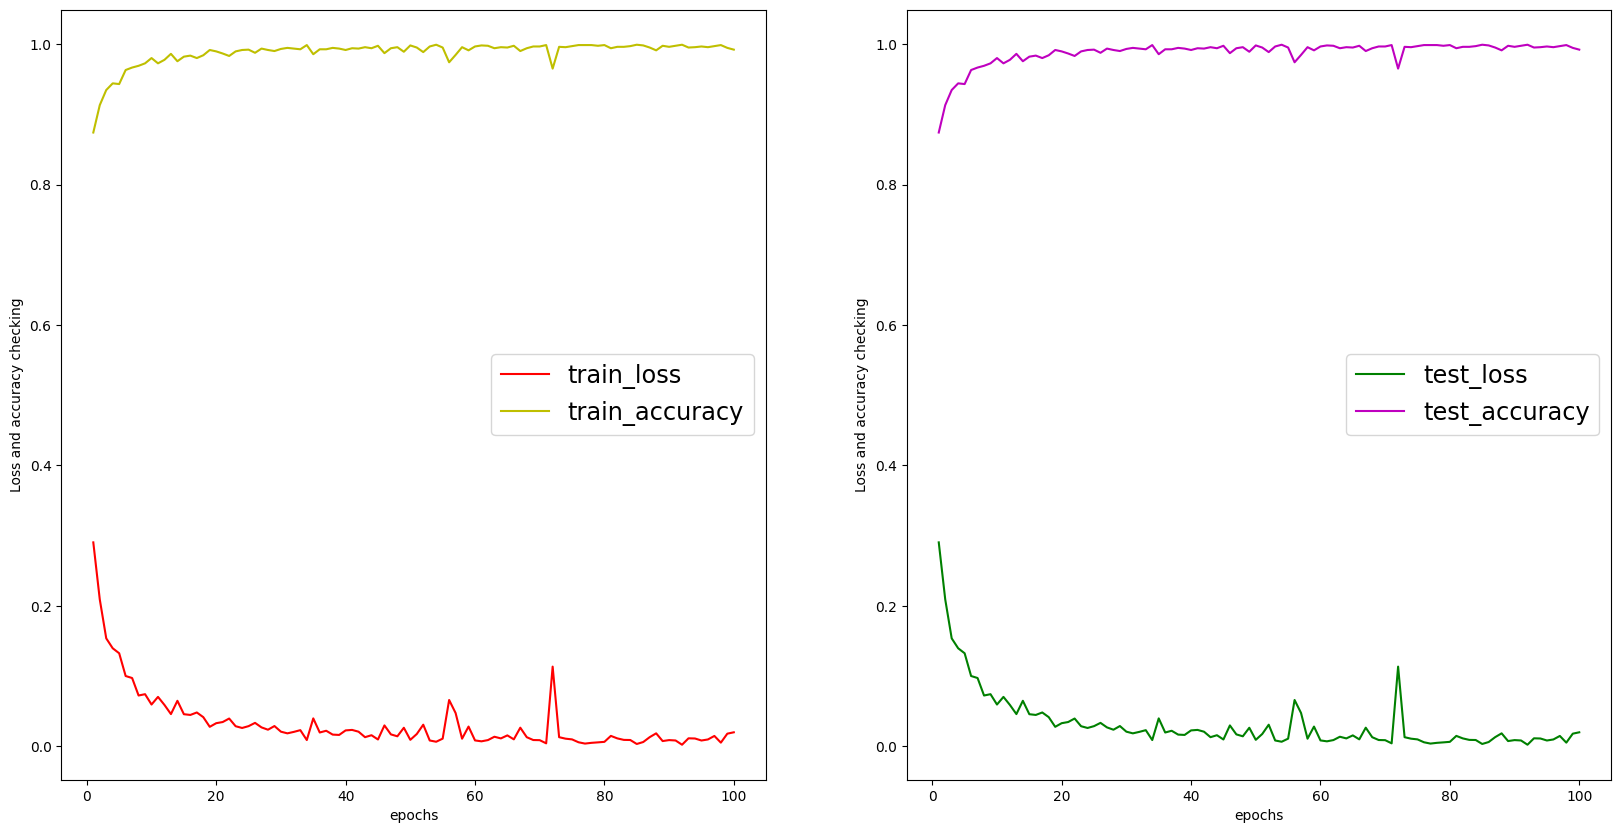

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(epochs,train_loss,color='r',label='train_loss')
plt.plot(epochs,train_accuracy,color='y',label='train_accuracy')
plt.legend(loc='best',fontsize='xx-large')
plt.xlabel("epochs")
plt.ylabel('Loss and accuracy checking')
plt.subplot(1,2,2)
plt.plot(epochs,test_loss,color='g',label='test_loss')
plt.plot(epochs,test_accuracy,color='m',label='test_accuracy')
plt.xlabel("epochs")
plt.ylabel('Loss and accuracy checking')
plt.legend(loc='best',fontsize='xx-large')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
classes = {0:"Cat",1:'Dog'}
for i in classes.items():
    print(i)

(0, 'Cat')
(1, 'Dog')


In [ ]:
## Predicting (testing)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[1.]]
[0]
Cat


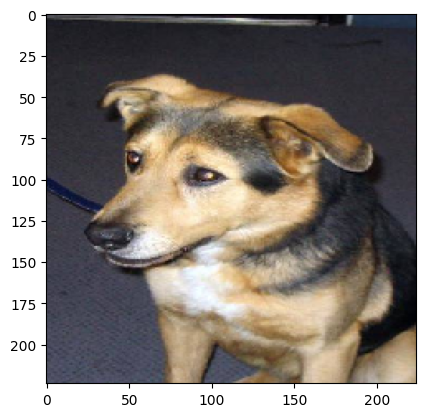

In [ ]:
image_path = '/content/dogs_cats_sample_1000/dogs_cats_sample_1000/ test/dogs/dog.10116.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.]]
[0]
Cat


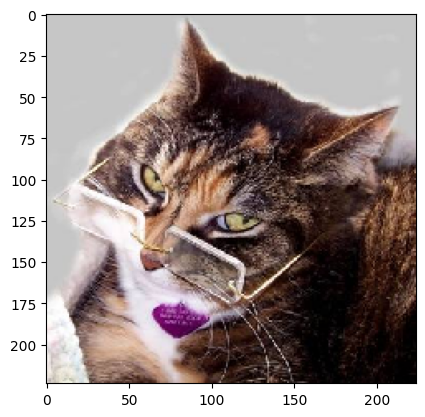

In [ ]:
image_path = '/content/dogs_cats_sample_1000/dogs_cats_sample_1000/ test/cats/cat.10035.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[1.]]
[0]
Cat


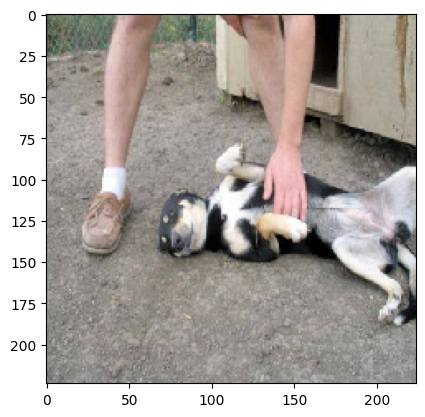

In [ ]:
image_path = '/content/dogs_cats_sample_1000/dogs_cats_sample_1000/ test/dogs/dog.10092.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[1.]]
[0]
Cat


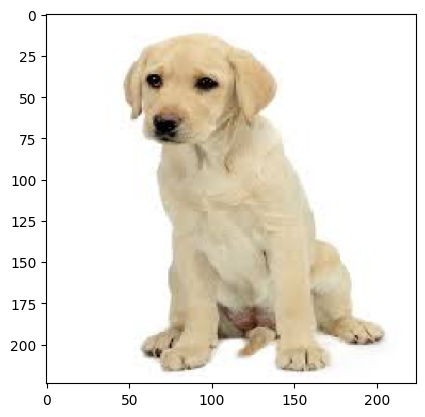

In [ ]:
image_path = '/content/1.jpeg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[1.]]
[0]
Cat


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


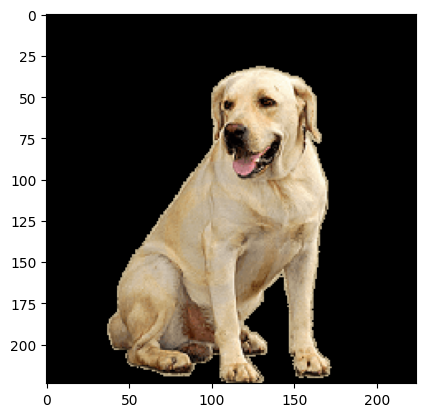

In [ ]:
image_path = '/content/german-shepherd-dog-transparent-png-stickpng-22.png'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)
